# Pete's clean version

**To create the `movies.db` database, run the code cells below.**
> The Entity Relational Diagram is below

In [1]:
import pandas as pd
import sqlite3 
conn = sqlite3.connect('data/movies.db')
cur = conn.cursor()
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
pd.options.display.float_format='{:.2f}'.format

In [2]:
from src.make_db import create_movies_db

In [3]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

### what is the net profit of movies over the last 20 years?

In [4]:
tn_budgets = pd.read_sql('''SELECT *
                 FROM tn_movie_budgets
                 ;''', conn)
tn_budgets.info()
#tn_budgets has 5,782 obs in 7 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   idx                5782 non-null   int64 
 1   id                 5782 non-null   int64 
 2   release_date       5782 non-null   object
 3   movie              5782 non-null   object
 4   production_budget  5782 non-null   object
 5   domestic_gross     5782 non-null   object
 6   worldwide_gross    5782 non-null   object
dtypes: int64(2), object(5)
memory usage: 316.3+ KB


In [5]:
#work with the tn_budgets data table
tn_budgets.head()

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
#turn date to datetime
tn_budgets.release_date = pd.to_datetime(tn_budgets.release_date)
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idx                5782 non-null   int64         
 1   id                 5782 non-null   int64         
 2   release_date       5782 non-null   datetime64[ns]
 3   movie              5782 non-null   object        
 4   production_budget  5782 non-null   object        
 5   domestic_gross     5782 non-null   object        
 6   worldwide_gross    5782 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 316.3+ KB


In [7]:
# #sort for decade from 2010-2020 for tn_budgets
tn_budgets = tn_budgets[(tn_budgets['release_date'] >= '2000-01-01') & (tn_budgets['release_date'] <= '2020-01-01')]
tn_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4384 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idx                4384 non-null   int64         
 1   id                 4384 non-null   int64         
 2   release_date       4384 non-null   datetime64[ns]
 3   movie              4384 non-null   object        
 4   production_budget  4384 non-null   object        
 5   domestic_gross     4384 non-null   object        
 6   worldwide_gross    4384 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 274.0+ KB


In [8]:
year = tn_budgets['release_date'].apply(lambda x: x.year)
tn_budgets['date_year'] = year
tn_budgets.head()

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,date_year
0,0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


In [9]:
#make gross
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace(',', '', regex = True)
tn_budgets['production_budget'] = tn_budgets['production_budget'].str.replace('$', '', regex = True).astype(int)
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace(',', '', regex = True)
tn_budgets['domestic_gross'] = tn_budgets['domestic_gross'].str.replace('$', '', regex = True).astype(int)
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace(',', '', regex = True)
tn_budgets['worldwide_gross'] = tn_budgets['worldwide_gross'].str.replace('$', '', regex = True).astype(float)

#create total gross & net profit
tn_budgets['total_gross'] = tn_budgets['worldwide_gross'] + tn_budgets['domestic_gross']
tn_budgets['net_profit'] = tn_budgets['total_gross'] - tn_budgets['production_budget']
tn_budgets.head()

,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,date_year,total_gross,net_profit
0,0,1,2009-12-18,Avatar,425000000,760507625,2776345279.00,2009,3536852904.00,3111852904.00
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875.00,2011,1286727750.00,876127750.00
2,2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350.00,2019,192524700.00,-157475300.00
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963.00,2015,1862019831.00,1531419831.00
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747.00,2017,1936903129.00,1619903129.00


In [10]:
tn_budgets.describe()

,idx,id,production_budget,domestic_gross,worldwide_gross,date_year,total_gross,net_profit
count,4384.00,4384.00,4384.00,4384.00,4384.00,4384.00,4384.00,4384.00
mean,2817.95,50.09,34467520.21,41859723.49,96998528.98,2009.31,138858252.47,104390732.26
std,1704.77,28.61,45484907.66,71284643.93,186256547.85,5.27,254551990.83,221132343.35
min,0.00,1.00,1100.00,0.00,0.00,2000.00,0.00,-157475300.00
25%,1338.75,25.00,5000000.00,562093.50,2703806.25,2005.00,4106161.25,-650000.00
50%,2765.50,50.00,18000000.00,15422481.50,29399883.00,2009.00,44825825.50,22648431.50
75%,4283.25,75.00,43000000.00,51761105.00,101582713.00,2014.00,154363105.75,112572136.25
max,5781.00,100.00,425000000.00,936662225.00,2776345279.00,2019.00,3536852904.00,3111852904.00


In [11]:
tn_summary=tn_budgets.groupby('date_year').mean('total_gross')
tn_summary

,idx,id,production_budget,domestic_gross,worldwide_gross,total_gross,net_profit
date_year,,,,,,,
2000,2686.38,50.87,31167926.16,39226313.51,68910622.77,108136936.29,76969010.13
2001,2574.21,52.56,32534640.88,43697064.26,80968448.93,124665513.19,92130872.31
2002,2662.51,50.18,31214464.85,41835559.74,78225101.70,120060661.44,88846196.59
2003,2777.04,46.70,32269492.54,41817463.87,82097273.71,123914737.58,91645245.04
2004,2532.04,49.55,35283019.30,44130480.20,89249075.58,133379555.78,98096536.49
2005,2738.63,49.94,33377103.96,37432258.86,78885834.95,116318093.81,82940989.85
2006,2963.18,49.18,28817957.69,33384434.96,71638643.96,105023078.92,76205121.23
2007,2776.93,49.30,33270459.09,37601499.98,86417669.22,124019169.20,90748710.11
2008,2843.62,51.44,31733132.16,35424972.25,81554074.21,116979046.47,85245914.31


In [12]:
tn_summary.reset_index(inplace=True)
tn_summary

,date_year,idx,id,production_budget,domestic_gross,worldwide_gross,total_gross,net_profit
0,2000,2686.38,50.87,31167926.16,39226313.51,68910622.77,108136936.29,76969010.13
1,2001,2574.21,52.56,32534640.88,43697064.26,80968448.93,124665513.19,92130872.31
2,2002,2662.51,50.18,31214464.85,41835559.74,78225101.70,120060661.44,88846196.59
3,2003,2777.04,46.70,32269492.54,41817463.87,82097273.71,123914737.58,91645245.04
4,2004,2532.04,49.55,35283019.30,44130480.20,89249075.58,133379555.78,98096536.49
5,2005,2738.63,49.94,33377103.96,37432258.86,78885834.95,116318093.81,82940989.85
6,2006,2963.18,49.18,28817957.69,33384434.96,71638643.96,105023078.92,76205121.23
7,2007,2776.93,49.30,33270459.09,37601499.98,86417669.22,124019169.20,90748710.11
8,2008,2843.62,51.44,31733132.16,35424972.25,81554074.21,116979046.47,85245914.31
9,2009,2740.14,47.42,35612322.18,43827459.08,100394322.92,144221782.01,108609459.83


Text(0.5, 1.0, 'Average Worldwide Gross Earnings')

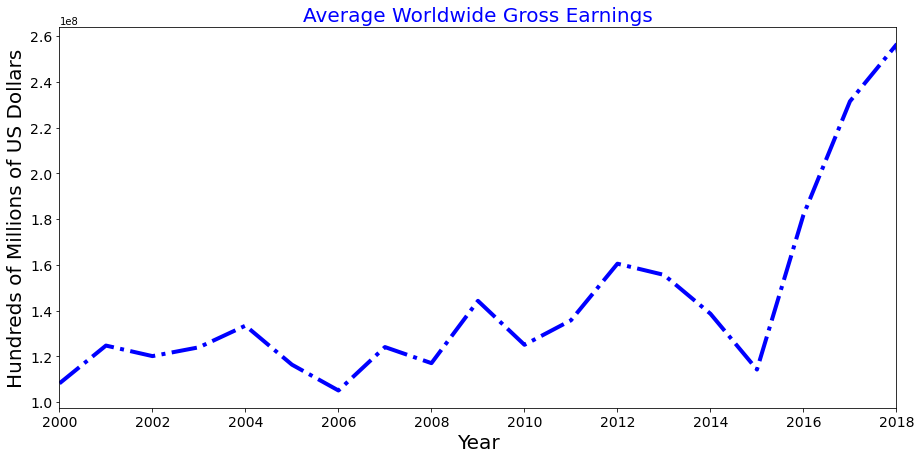

In [57]:
fig, ax = plt.subplots(figsize = (15,7))
ax.plot(tn_summary['date_year'], tn_summary['total_gross'], color='blue', linewidth=4, linestyle='-.')
ax.ticklabel_format(axis='y', style = 'sci')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
ax.set_xlabel('Year', fontsize=20)
ax.set_xlim(2000, 2018)
ax.set_ylabel('Hundreds of Millions of US Dollars', fontsize=20)
ax.set_title('Average Worldwide Gross Earnings', color='blue', fontsize=20)

========================

#### make a plot of the top movie gross 1995-2021
based on data from here: https://m.the-numbers.com/market/

In [14]:
gross = pd.read_csv('data/tn_top_grossers.csv') 


In [15]:
gross['Total Box Office'] = gross['Total Box Office'].str.replace(',', '', regex = True)
gross['Total Box Office'] = gross['Total Box Office'].str.replace('$', '', regex = True)
gross[['Total Box Office']] = gross[['Total Box Office']].apply(pd.to_numeric) 
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Rank              15 non-null     int64 
 1   Genre             15 non-null     object
 2   Movies            15 non-null     object
 3   Total Box Office  15 non-null     int64 
 4   Tickets           15 non-null     object
 5   Share             15 non-null     object
dtypes: int64(2), object(4)
memory usage: 848.0+ bytes


### ===================APPENDIX====================

#### everything below was included as extra material in the presentation

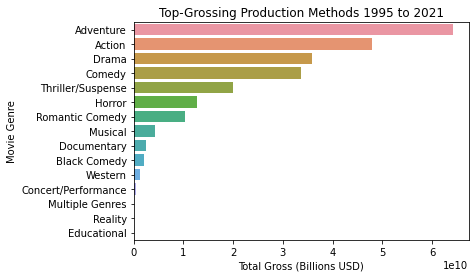

In [16]:
gross_plot = sns.barplot(data=gross, y="Genre", x="Total Box Office")
gross_plot.set(xlabel = "Total Gross (Billions USD)", ylabel='Movie Genre', title='Top-Grossing Production Methods 1995 to 2021')
gross_plot;